# Conversion Rate Analysis Based on Income, Spending, and Age

## Load Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://drive.google.com/uc?id=1_45XkBzzTdgAH2RBWXVDi_B8TXnGzp8g'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

## Feature Engineering

In [4]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
df['Age'] = 2022 - df['Year_Birth']
df['Age_Category'] = np.where(df['Age'] < 16, 'Children',
                    (np.where(df['Age'] < 30, 'Youth Adults',
                    (np.where(df['Age'] < 45, 'Middle-aged Adults', 'Old-aged Adults')))))
df['Total_Spend'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts']  + df['MntSweetProducts'] + df['MntGoldProds']
df['Total_Purchase'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['Total_Acc_Cmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

def rate(x,y):
    if y == 0:
        return 0
    return x / y
df['Conversion_Rate'] = df.apply(lambda x: rate(x['Total_Purchase'],x['NumWebVisitsMonth']), axis=1)
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Z_CostContact,Z_Revenue,Response,Total_Children,Age,Age_Category,Total_Spend,Total_Purchase,Total_Acc_Cmp,Conversion_Rate
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,3,11,1,0,65,Old-aged Adults,1617000,25,0,3.571429
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,3,11,0,2,68,Old-aged Adults,27000,6,0,1.200000
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,3,11,0,0,57,Old-aged Adults,776000,21,0,5.250000
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,3,11,0,1,38,Middle-aged Adults,53000,8,0,1.333333
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,3,11,0,1,41,Middle-aged Adults,422000,19,0,3.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,...,3,11,0,1,55,Old-aged Adults,1341000,18,0,3.600000
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,3,11,0,3,76,Old-aged Adults,444000,22,1,3.142857
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,...,3,11,0,0,41,Middle-aged Adults,1241000,19,1,3.166667
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,...,3,11,0,1,66,Old-aged Adults,843000,23,0,7.666667


## Exploratory Data Analysis

<AxesSubplot:>

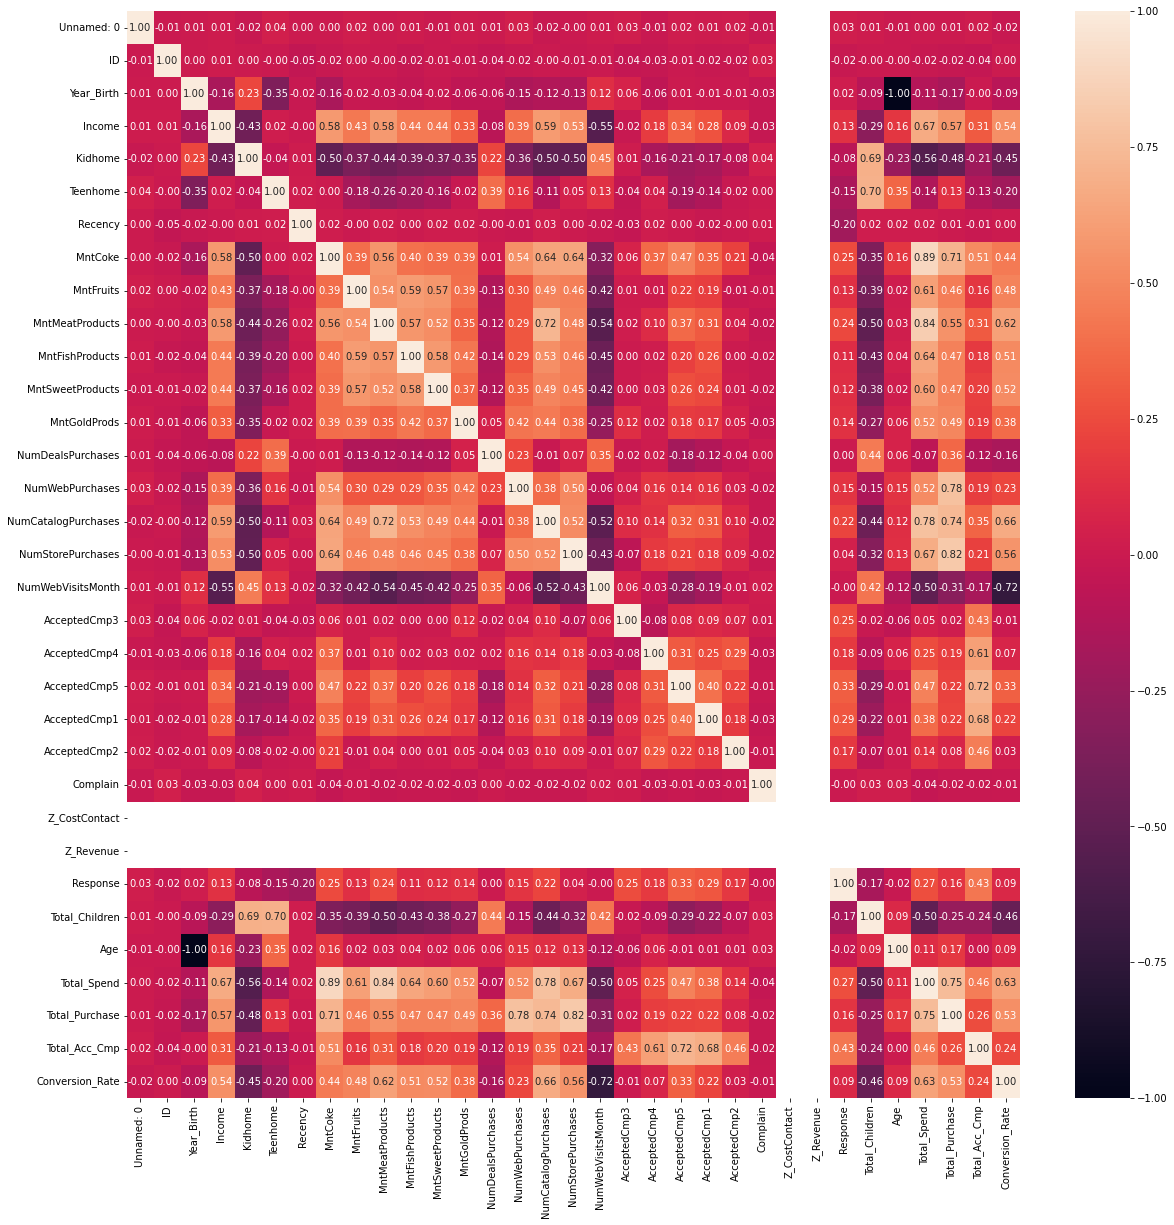

In [5]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

`Conversion_Rate` has a strong positive correlation with `Income` and `Total_Spend` where these columns also have a fairly strong correlation with `campaigns` so that they have greater potential to respond to campaigns.

<AxesSubplot:xlabel='Income', ylabel='Conversion_Rate'>

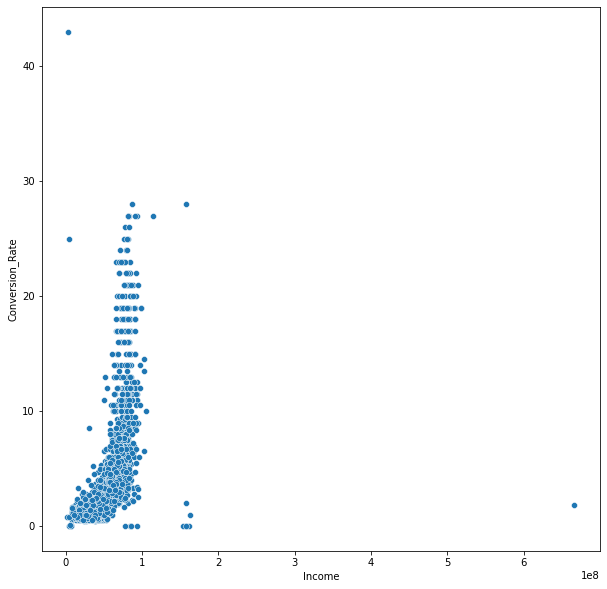

In [6]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='Income', y='Conversion_Rate')

<AxesSubplot:xlabel='Total_Spend', ylabel='Conversion_Rate'>

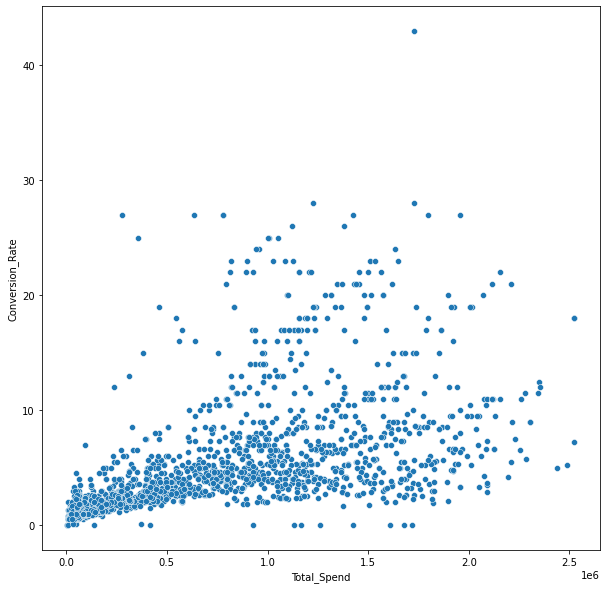

In [7]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='Total_Spend', y='Conversion_Rate')

<AxesSubplot:xlabel='Age_Category', ylabel='Conversion_Rate'>

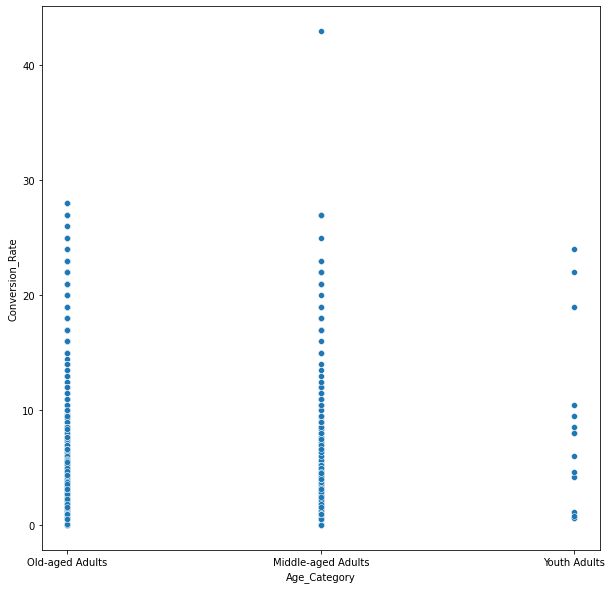

In [8]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='Age_Category', y='Conversion_Rate')

# Data Cleaning and Data Preprocessing

## Handling Missing Value

In [9]:
df.isnull().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Total_Children          0
Age                     0
Age_Category            0
Total_Spend             0
Total_Purchase          0
Total_Acc_Cmp           0
Conversion_Rate         0
dtype: int64

In [10]:
df['Income'] = df['Income'].fillna(df['Income'].median())

## Handling Duplicated Data

In [11]:
df.duplicated().sum()

0

## Drop Columns

In [12]:
df2 = df.copy()
df2.drop(columns=['Unnamed: 0', 'ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue',
                 'Kidhome', 'Teenhome', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                 'NumCatalogPurchases', 'NumStorePurchases', 'AcceptedCmp1', 'AcceptedCmp2',
                 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Age'], inplace=True)

## Feature Encoding

In [13]:
numerical = df2.select_dtypes(exclude='object')
numerical = numerical.columns.to_list()
category = df2.select_dtypes(include='object')
category = category.columns.to_list()

In [14]:
category

['Education', 'Marital_Status', 'Age_Category']

In [15]:
mapping_education = {
    'SMA':0,
    'D3':1,
    'S1':2,
    'S2':3,
    'S3':4
}

df2['Education'] = df2['Education'].map(mapping_education)

In [16]:
mapping_age = {
    'Children':0,
    'Youth Adults':1,
    'Middle-aged Adults':2,
    'Old-aged Adults':3
}

df2['Age_Category'] = df2['Age_Category'].map(mapping_age)

In [17]:
onehots = pd.get_dummies(df['Marital_Status'], prefix='Marital_Status')
df2 = df2.join(onehots)

In [18]:
df2.drop(columns=['Marital_Status'], inplace=True)

## Feature Standardization

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
for i in numerical:
    scaler = StandardScaler().fit(df2[[i]])
    df2[i] = scaler.transform(df2[[i]])

df2

,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,Total_Children,Age_Category,Total_Spend,Total_Purchase,Total_Acc_Cmp,Conversion_Rate,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah
0,2,0.235696,0.307039,0.693904,-0.097282,2.388846,-1.264505,3,1.679417,1.320826,-0.439037,-0.167692,0,0,0,0,1,0
1,2,-0.235454,-0.383664,-0.130463,-0.097282,-0.418612,1.396361,3,-0.961275,-1.154596,-0.439037,-0.650423,0,0,0,0,1,0
2,2,0.773999,-0.798086,-0.542647,-0.097282,-0.418612,-1.264505,3,0.282673,0.799685,-0.439037,0.174000,1,0,0,0,0,0
3,2,-1.022355,-0.798086,0.281720,-0.097282,-0.418612,0.065928,2,-0.918094,-0.894025,-0.439037,-0.623282,1,0,0,0,0,0
4,4,0.241888,1.550305,-0.130463,-0.097282,-0.418612,0.065928,2,-0.305254,0.539114,-0.439037,-0.121164,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,0.358936,-0.107383,-0.130463,-0.097282,-0.418612,0.065928,3,1.221032,0.408829,-0.439037,-0.161876,0,0,0,0,0,1
2236,4,0.470432,0.237969,0.693904,-0.097282,-0.418612,2.726794,3,-0.268717,0.929970,1.035390,-0.254933,1,0,0,0,0,0
2237,2,0.189476,1.446700,0.281720,-0.097282,-0.418612,-1.264505,2,1.054951,0.539114,1.035390,-0.250086,0,1,0,0,0,0
2238,3,0.679401,-1.419719,-0.954831,-0.097282,-0.418612,0.065928,3,0.393948,1.060255,-0.439037,0.665939,1,0,0,0,0,0


# Data Modeling

## Elbow Method K-means Clustering

In [21]:
from sklearn.cluster import KMeans

In [22]:
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=3)
    kmeans.fit(df2.values)
    inertia.append(kmeans.inertia_)

print(inertia)

[20338.895375183118, 18145.004891008044, 16326.828453374155, 14901.464748042968, 13973.354286284102, 12960.280434797269, 12412.608027026934, 11948.97005090701, 11390.35749270939]


Text(0.5, 1.0, 'Elbow Method of K-means Clustering')

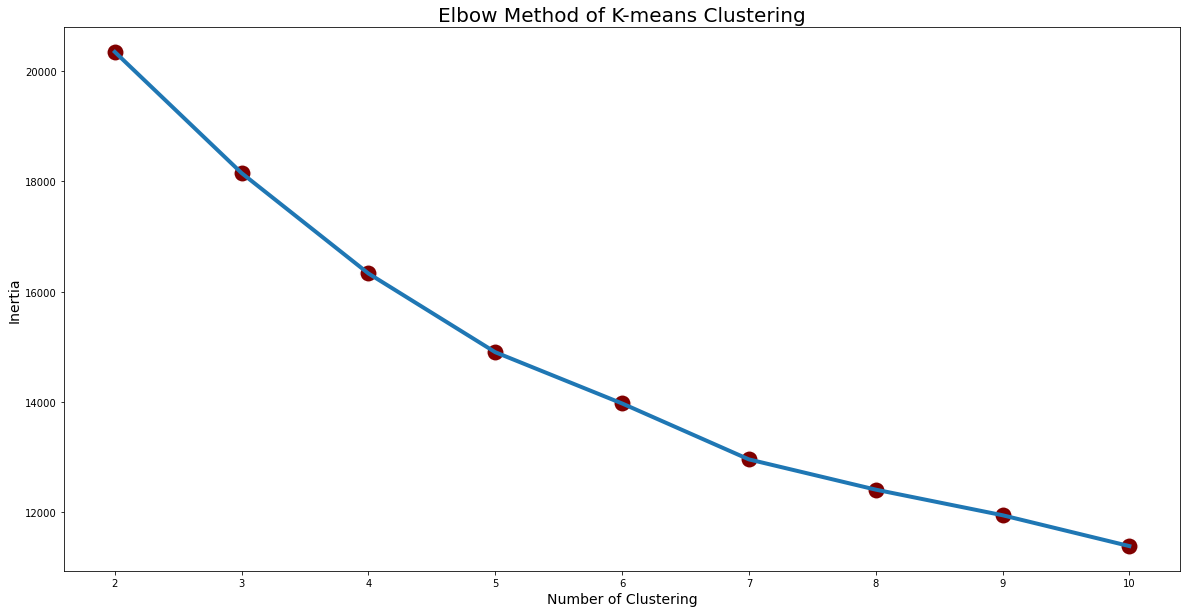

In [23]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=range(2, 11), y=inertia, linewidth=4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000')
plt.ylabel('Inertia', fontsize=14)
plt.xlabel('Number of Clustering', fontsize=14)
plt.title('Elbow Method of K-means Clustering', fontsize=20)

In [24]:
elbow_method = pd.DataFrame({'Intertia':inertia})
elbow_method['Change'] = elbow_method.pct_change().shift(-1)
elbow_method

,Intertia,Change
0,20338.895375,-0.107867
1,18145.004891,-0.100203
2,16326.828453,-0.087302
3,14901.464748,-0.062283
4,13973.354286,-0.072500
5,12960.280435,-0.042258
6,12412.608027,-0.037352
7,11948.970051,-0.046750
8,11390.357493,NaN


The largest percentage decrease lies in the number of clusters 3 and 4. Here, 4 clusters are selected.

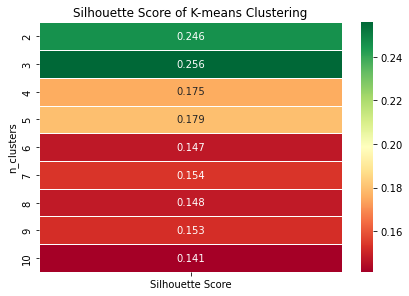

In [25]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,11)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=3)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=['n_clusters', 'Silhouette Score'])
    pivot_km = pd.pivot_table(result, index='n_clusters', values='Silhouette Score')

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

visualize_silhouette_layer(df2)

# Customer Personality Analysis for Marketing Retargeting

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=3)
kmeans.fit(df2.values)
df2['Cluster'] = kmeans.labels_
df['Cluster'] = kmeans.labels_

<AxesSubplot:xlabel='Total_Spend', ylabel='Income'>

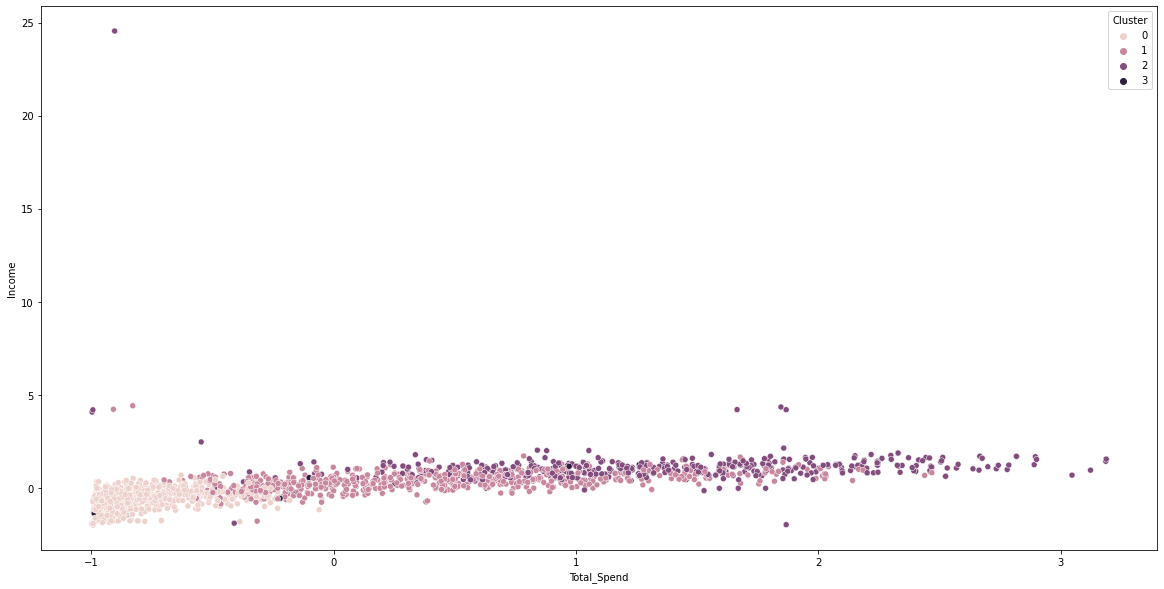

In [27]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(x="Total_Spend", y="Income", hue="Cluster", data=df2)

In [28]:
df_cluster = df.groupby(['Cluster']).agg({'Total_Spend': ['count', 'mean', 'median', 'min', 'max'],
                                                'Income':['count', 'mean', 'median', 'min', 'max']})
df_cluster

Total_Spend                                          Income  \
              count          mean     median    min      max  count   
Cluster                                                               
0              1075  1.109312e+05    68000.0   5000   577000   1075   
1               681  8.455213e+05   794000.0  59000  2092000    681   
2               463  1.412596e+06  1385000.0   6000  2525000    463   
3                21  3.764286e+05    92000.0  11000  1365000     21   

                                                            
                 mean      median         min          max  
Cluster                                                     
0        3.501298e+07  35196000.0   1730000.0   69139000.0  
1        6.114651e+07  61223000.0   7144000.0  162397000.0  
2        7.944546e+07  78420000.0   2447000.0  666666000.0  
3        4.524229e+07  38998000.0  15716000.0   83257000.0

In [29]:
map_cluster = {
    0 : 'Risk of Churn',
    1 : 'Middle Spander',
    2 : 'High Spender',
    3 : 'Low Spander'
}

df['Cluster'] = df['Cluster'].map(map_cluster)

Text(0.5, 1.0, 'Total Users per Cluster')

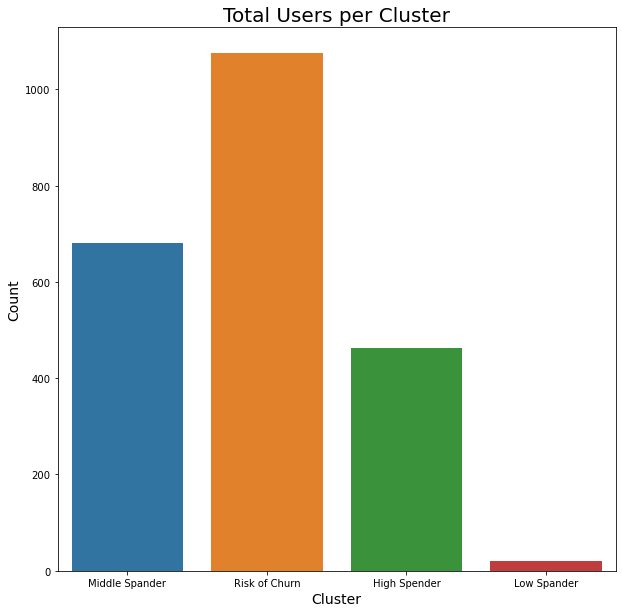

In [30]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['Cluster'])
plt.ylabel('Count', fontsize=14)
plt.xlabel('Cluster', fontsize=14)
plt.title('Total Users per Cluster', fontsize=20)

Text(0.5, 1.0, 'Age per Cluster')

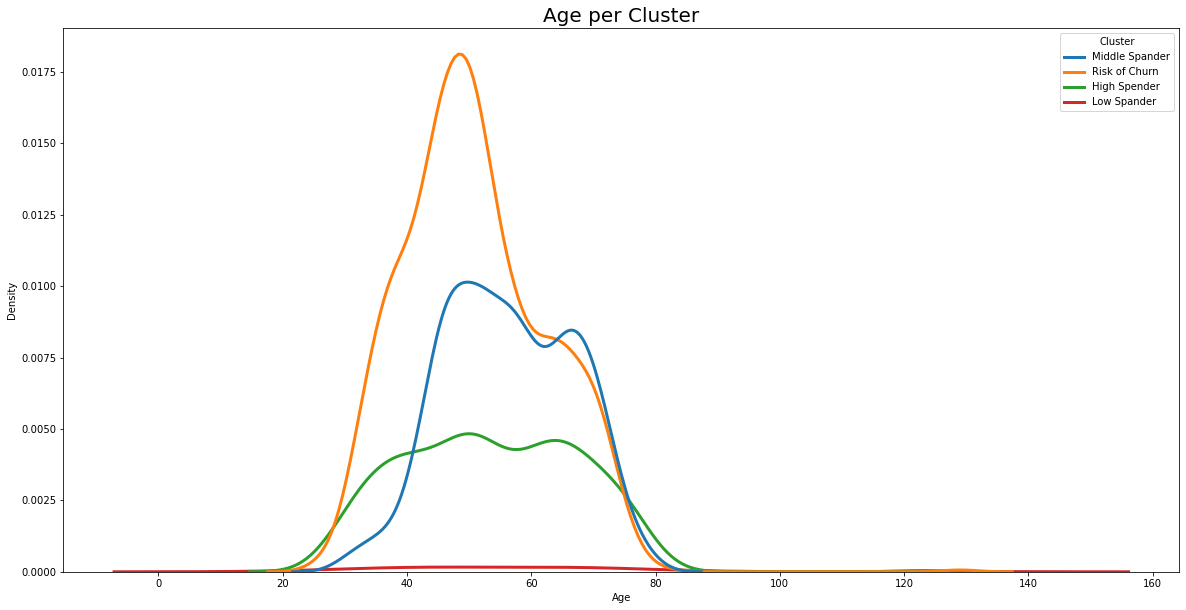

In [31]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df, x='Age', hue='Cluster', linewidth=3)
plt.title('Age per Cluster', fontsize=20)

Text(0.5, 1.0, 'Income per Cluster')

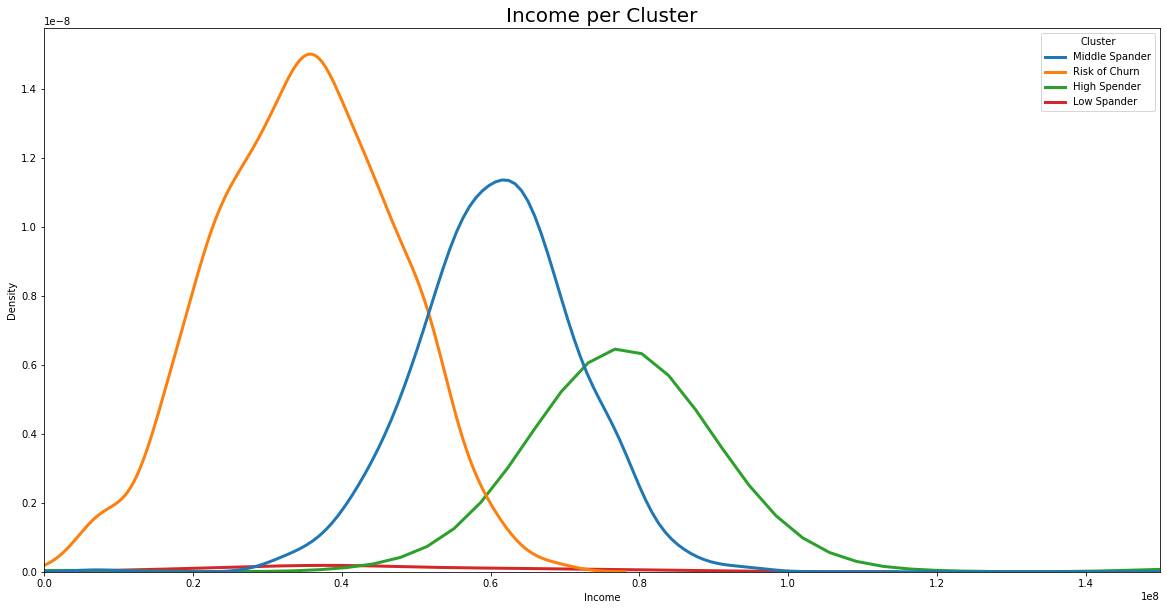

In [32]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df, x='Income', hue='Cluster', linewidth=3)
plt.xlim(0, 150000000)
plt.title('Income per Cluster', fontsize=20)

Text(0.5, 1.0, 'Total Spend per Cluster')

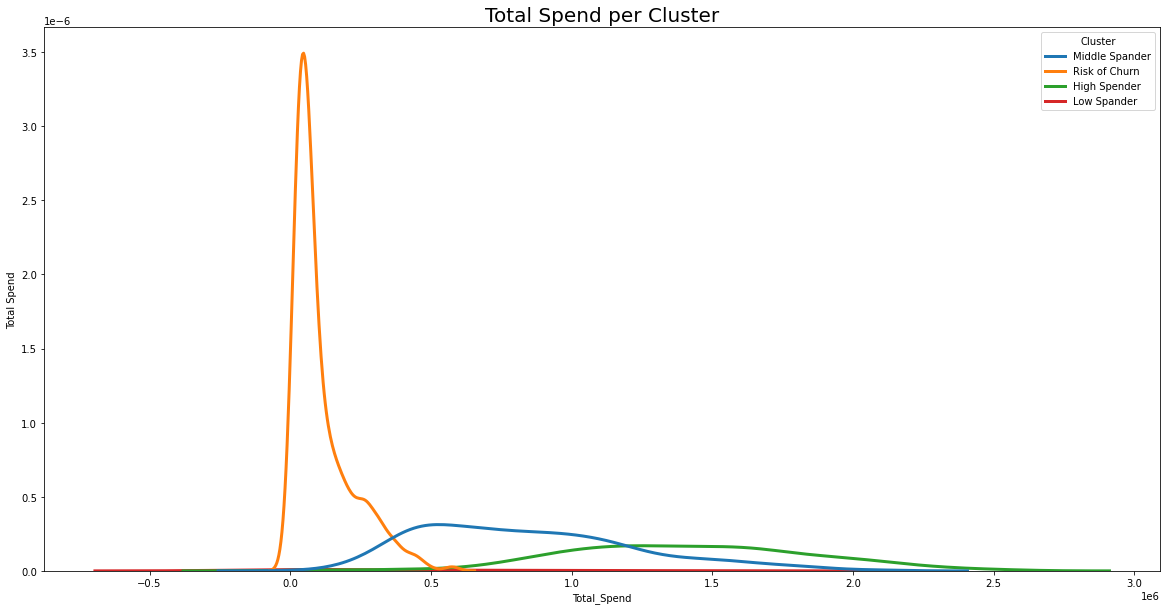

In [33]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df, x='Total_Spend', hue='Cluster', linewidth=3)
plt.ylabel('Total Spend')
plt.title('Total Spend per Cluster', fontsize=20)

Text(0.5, 1.0, 'Conversion Rate per Cluster')

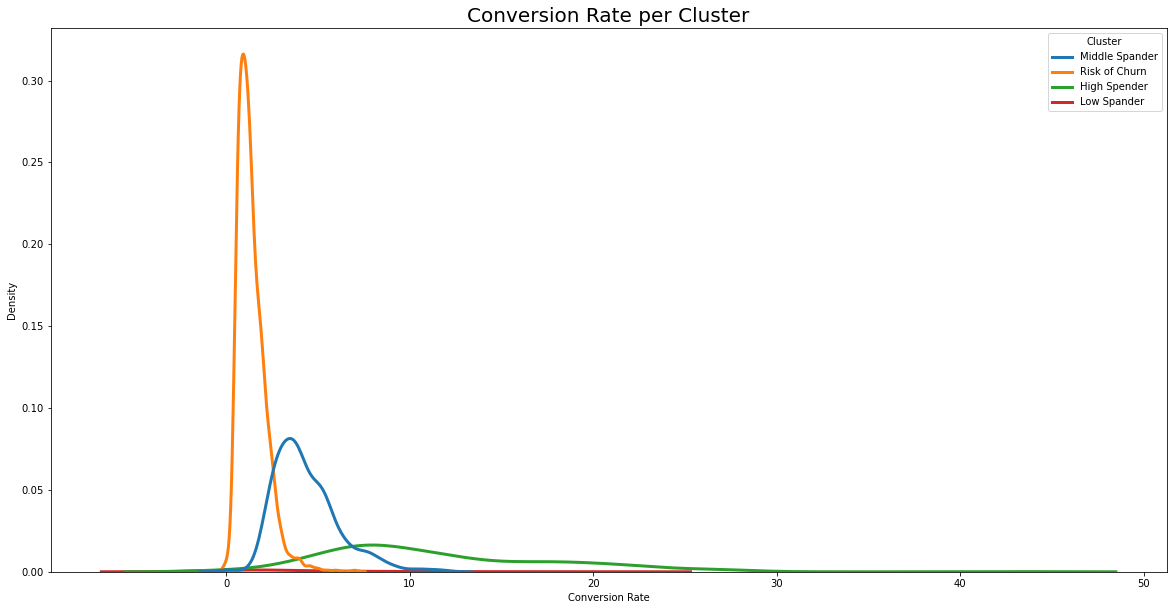

In [34]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df, x='Conversion_Rate', hue='Cluster', linewidth=3)
plt.xlabel('Conversion Rate')
plt.title('Conversion Rate per Cluster', fontsize=20)